In [1]:
%run utils.py
%run model.py

In [2]:
from utils import *
from model import *

import numpy as np
from collections import defaultdict
import pickle
import matplotlib.pyplot as plt

Инициализация сети

In [3]:
net, convergence = find_convergence(10, 10, 100, verbose=True)
# 13924 - max nodes
# 96_931_926 - max edges

# Если граф состоит из одной точки он не рисуется
# 10000, 1000000 - максимальные параметры для этого компа


  5%|▌         | 5/100 [00:00<00:00, 1983.50it/s]

STOPPED! at 5


In [2]:
base = 1.05

log = {}

for n in tqdm(range(3, 25)):
    p_max = int(n * (n - 1) / 2)

    for p in range(3, p_max):
        topologies_num = int((base**(n)) * np.log(p))
        # print(topologies_num)
        # print(n, p)
        for topology_num in range(topologies_num):

            _, convergence = find_convergence(n, p, 100, verbose=False)
            log[f"{n}_{p}_{topology_num}"] = convergence 

with open('log.pkl', 'wb') as file:
    pickle.dump(log, file)


  0%|          | 0/22 [00:00<?, ?it/s]


100%|██████████| 22/22 [50:51<00:00, 138.72s/it]


In [60]:
struct = defaultdict(lambda: defaultdict(list))
for key, value in log.items():
    n, p, _ = key.split("_")
    if n != 25:
        struct[int(n)][int(p)] += [value]

In [61]:
struct_def = defaultdict(lambda: defaultdict(int))

for n in struct.keys():
    for p in struct[n].keys():
        struct_def[n][p] = np.mean(struct[n][p])

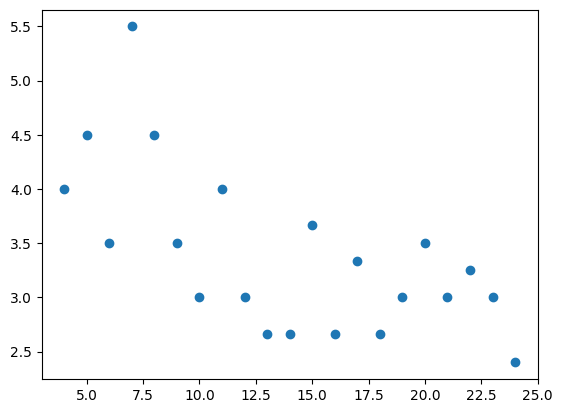

In [63]:
p = 5

X = list(struct_def.keys())
y = []
for n in struct_def.keys():
    y += [struct_def[n][p]]

plt.scatter(X, y)
plt.show()

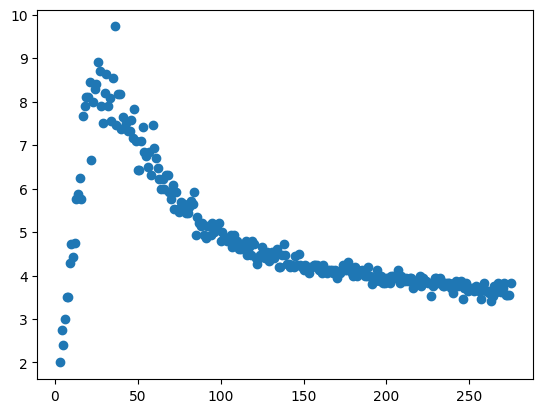

In [70]:
n = 24


X = list(struct_def[n].keys())
y = []
for p in struct_def[n].keys():
    y += [struct_def[n][p]]

plt.scatter(X, y)
plt.show()

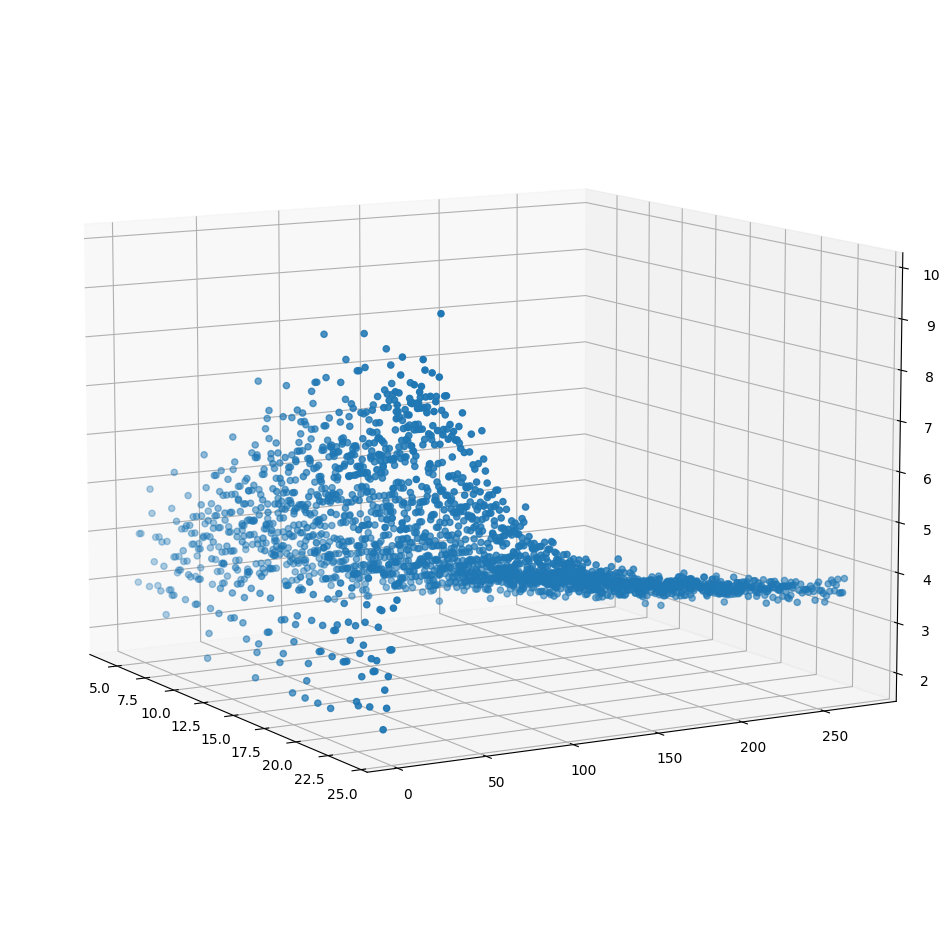

In [84]:
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(projection='3d')

triples = []
for n in struct_def.keys():
    for p in struct_def[n].keys():
        triples += [(n, p, struct_def[n][p])]


ax.azim = -30
ax.dist = 10
ax.elev = 10
X, Y, Z = [], [], []
for triple in triples:
    X += [triple[0]]
    Y += [triple[1]]
    Z += [triple[2]]

ax.scatter(X, Y, Z)

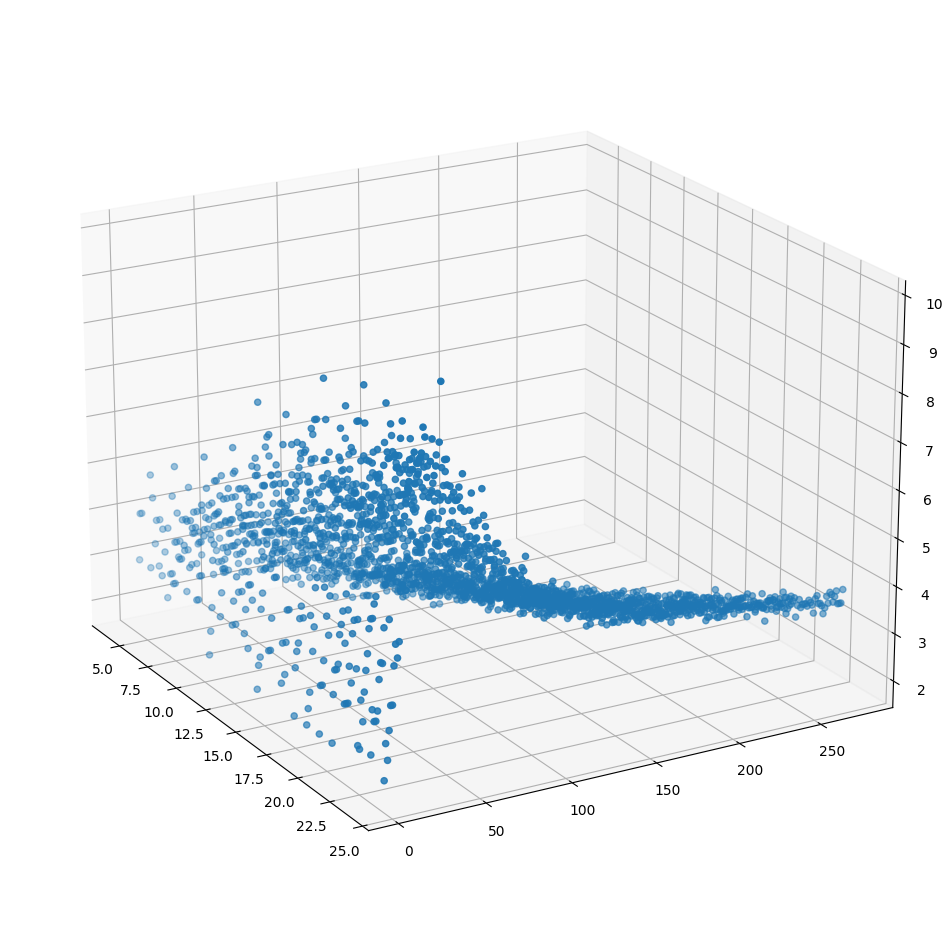

In [87]:
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(projection='3d')

triples = []
for n in struct_def.keys():
    for p in struct_def[n].keys():
        triples += [(n, p, struct_def[n][p])]


ax.azim = -30
ax.dist = 10
ax.elev = 20
X, Y, Z = [], [], []
for triple in triples:
    X += [triple[0]]
    Y += [triple[1]]
    Z += [triple[2]]

ax.scatter(X, Y, Z)

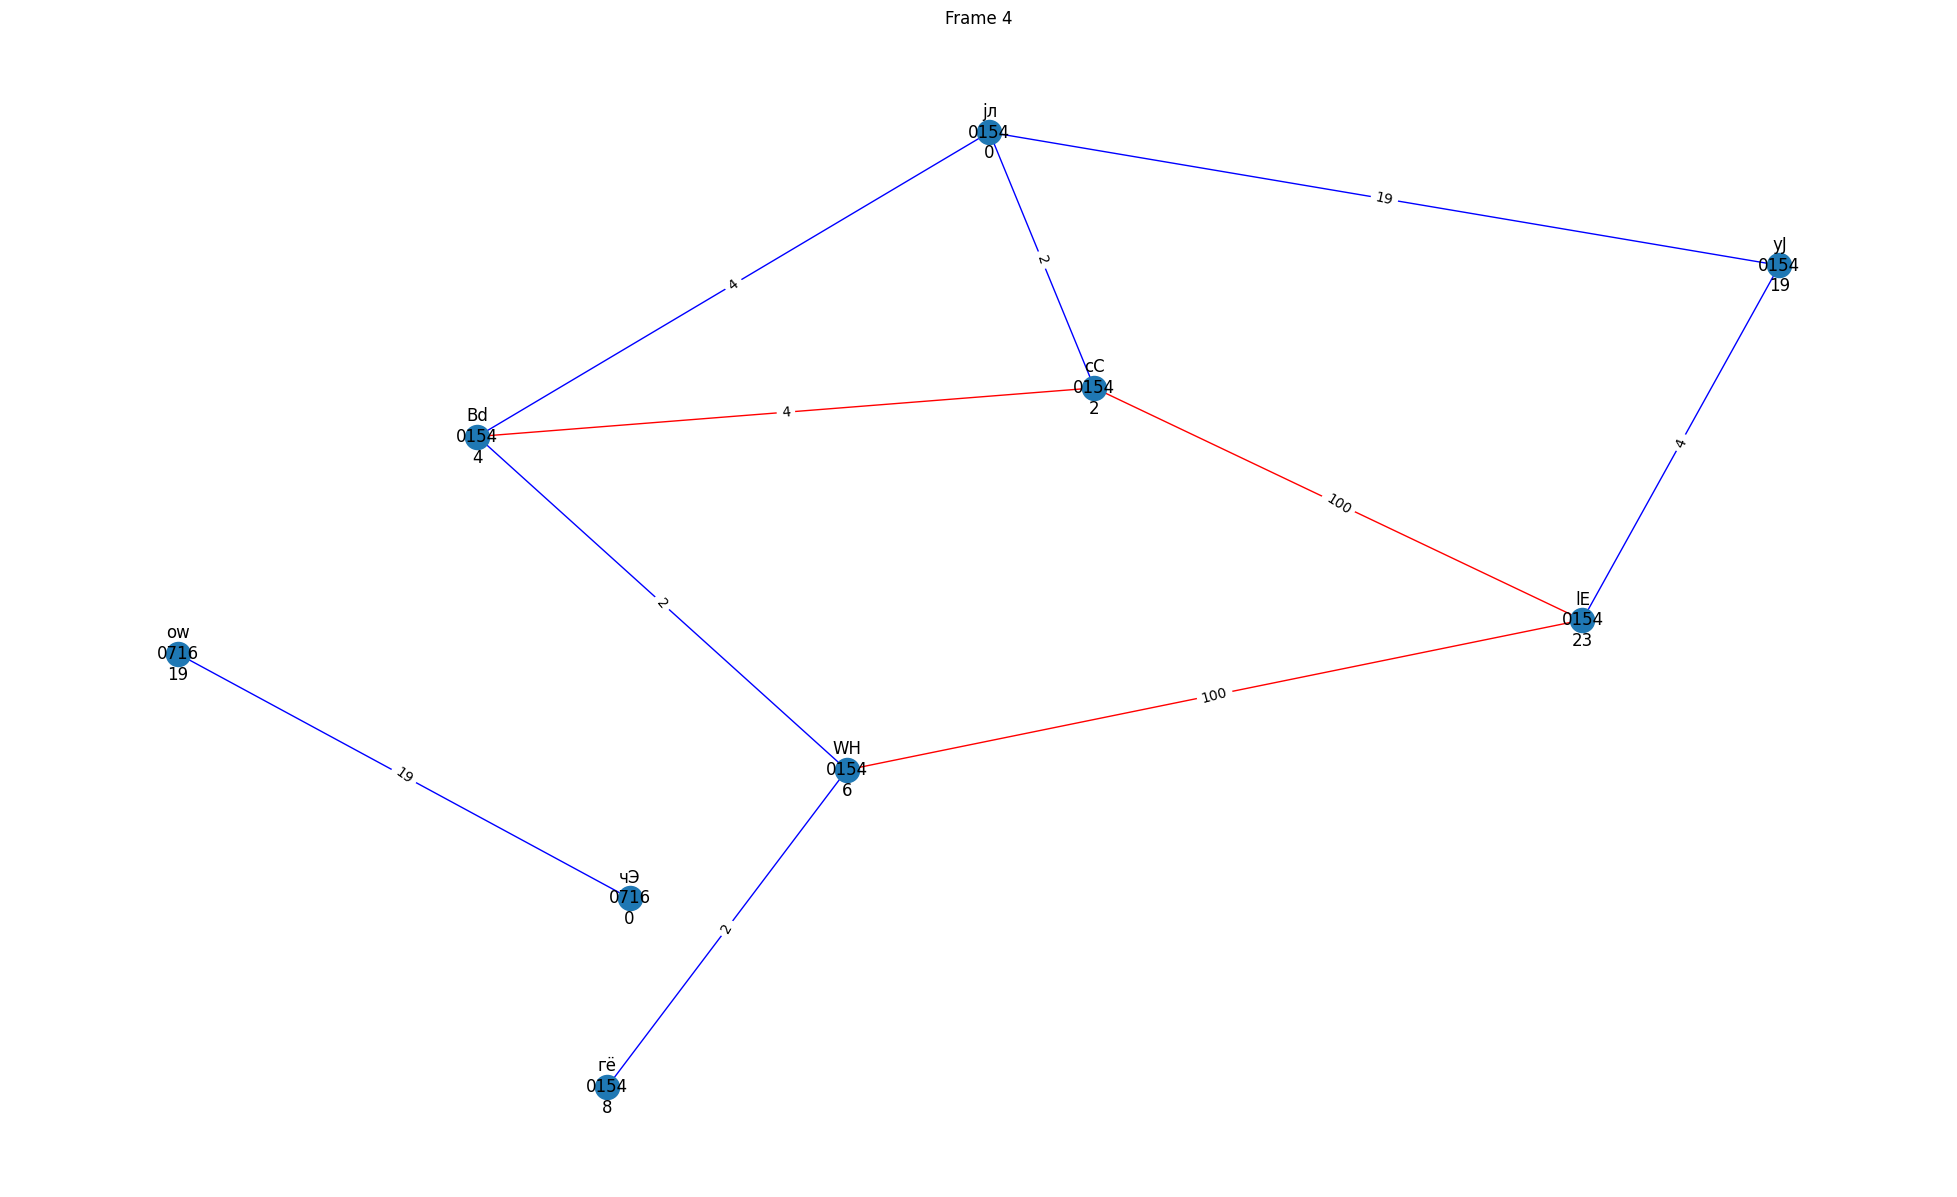

In [6]:
draw_stp(net, 'test-2', 4)